In [1]:
import pandas as pd
from binance.client import Client
import datetime as dt
from cred import api_key, api_secret
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

client = Client(api_key, api_secret)

In [15]:
symbol = "BTCUSDT"
interval='1h'
klines = client.get_historical_klines(symbol, interval, "1 Jan,2023")
data = pd.DataFrame(klines)
data.columns = ['time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol','taker_quote_vol', 'ignore']
            

,time,open,high,low,close,volume
0,1.672531e+12,16541.77,16545.70,16508.39,16529.67,4364.83570
1,1.672535e+12,16529.59,16556.80,16525.78,16551.47,3590.06669
2,1.672538e+12,16551.47,16559.77,16538.14,16548.19,3318.84038
3,1.672542e+12,16548.19,16548.19,16518.21,16533.04,4242.08050
4,1.672546e+12,16533.04,16535.97,16511.92,16521.85,4285.00909
...,...,...,...,...,...,...
441,1.674119e+12,20769.06,20810.00,20730.58,20795.39,8720.29962
442,1.674122e+12,20794.73,20802.97,20749.98,20796.47,7640.40190
443,1.674126e+12,20796.47,20799.83,20706.90,20743.72,9588.19257
444,1.674130e+12,20744.17,20775.71,20679.65,20727.03,10629.26480


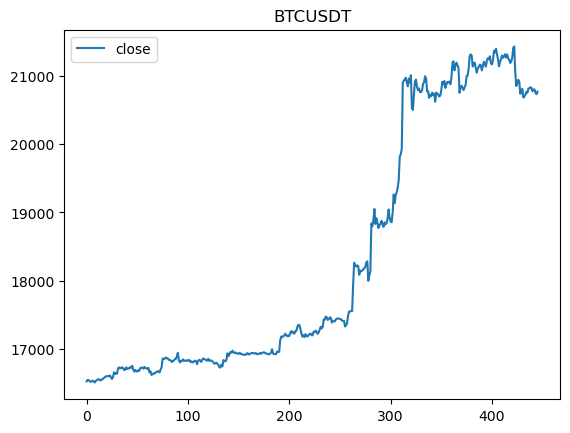

In [16]:
#data.index = [dt.datetime.fromtimestamp(x/1000.0) for x in data.close_time]
df= data.astype(float)
df["close"].plot(title = 'BTCUSDT', legend = 'close')
df=df.drop(['close_time','taker_base_vol','taker_quote_vol', 'ignore', 'qav','num_trades'], axis=1)
df

In [11]:
df.dtypes

open_time          float64
open               float64
high               float64
low                float64
close              float64
volume             float64
close_time         float64
qav                float64
num_trades         float64
taker_base_vol     float64
taker_quote_vol    float64
ignore             float64
dtype: object